AULA 1- Análise de Dados com Pandas

In [1]:
! pip install plotly --quiet

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import pycountry


In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [4]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [6]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [7]:
df.shape

(133349, 11)

In [8]:
linhas, colunas = df.shape[0], df.shape[1]
print('Linhas:', linhas)
print('Colunas:', colunas)

Linhas: 133349
Colunas: 11


In [9]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

Renomeando as colunas do DataFrame

In [10]:
# Dicionário de renomeação
novos_nomes = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}

# Aplicando renomeação
df.rename(columns=novos_nomes, inplace=True)

# Verificando resultado
df.head()
     

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


Analisando quais sãos as categorias das colunas categóricas

In [11]:
#Nível de senioridade


# O método .value_counts() serve para contar quantas vezes cada valor único aparece em uma coluna.
df['senioridade'].value_counts()

senioridade
SE    77241
MI    40465
EN    12443
EX     3200
Name: count, dtype: int64

Tipo de contrato

In [12]:
df['contrato'].value_counts()


contrato
FT    132563
CT       394
PT       376
FL        16
Name: count, dtype: int64

Regime de trabalho

In [13]:

df['remoto'].value_counts()

remoto
0      105312
100     27718
50        319
Name: count, dtype: int64

Tamanho da empresa


In [14]:
df['tamanho_empresa'].value_counts()


tamanho_empresa
M    129561
L      3574
S       214
Name: count, dtype: int64

Modificando o nome das categorias:


In [15]:
senioridade = {
    'SE': 'senior',
    'MI': 'pleno',
    'EN': 'junior',
    'EX': 'executivo'
}
df['senioridade'] = df['senioridade'].replace(senioridade)
df['senioridade'].value_counts()

senioridade
senior       77241
pleno        40465
junior       12443
executivo     3200
Name: count, dtype: int64

In [16]:
contrato = {
    'FT': 'integral',
    'PT': 'parcial',
    'CT': 'contrato',
    'FL': 'freelancer'
}
df['contrato'] = df['contrato'].replace(contrato)
df['contrato'].value_counts()

contrato
integral      132563
contrato         394
parcial          376
freelancer        16
Name: count, dtype: int64

In [17]:
tamanho_empresa = {
    'L': 'grande',
    'S': 'pequena',
    'M':	'media'

}
df['tamanho_empresa'] = df['tamanho_empresa'].replace(tamanho_empresa)
df['tamanho_empresa'].value_counts()

tamanho_empresa
media      129561
grande       3574
pequena       214
Name: count, dtype: int64

In [18]:
mapa_trabalho = {
    0: 'presencial',
    100: 'remoto',
    50: 'hibrido'
}

df['remoto'] = df['remoto'].replace(mapa_trabalho)
df['remoto'].value_counts()

remoto
presencial    105312
remoto         27718
hibrido          319
Name: count, dtype: int64

In [19]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025.0,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025.0,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025.0,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025.0,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


In [20]:
df.describe(include='object')

,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,senior,integral,Data Scientist,USD,US,presencial,US,media
freq,77241,132563,17314,126140,119579,105312,119641,129561


AULA 2- Preparação e limpeza dos Dados

In [21]:
df.isnull().sum()

ano                10
senioridade         0
contrato            0
cargo               0
salario             0
moeda               0
usd                 0
residencia          0
remoto              0
empresa             0
tamanho_empresa     0
dtype: int64

In [22]:
df['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [23]:
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,senior,integral,Product Manager,184500,USD,184500,US,presencial,US,media
59692,NaN,pleno,integral,Engineer,110000,USD,110000,DE,presencial,DE,media
59710,NaN,junior,integral,Data Scientist,208800,USD,208800,US,presencial,US,media
59759,NaN,senior,integral,Software Engineer,135000,USD,135000,US,presencial,US,media
59789,NaN,senior,integral,Engineer,112000,USD,112000,US,presencial,US,media
131000,NaN,senior,integral,Machine Learning Engineer,163800,USD,163800,US,presencial,US,media
131006,NaN,senior,integral,Data Analytics Manager,204500,USD,204500,US,presencial,US,media
133054,NaN,junior,integral,Data Scientist,40000,USD,40000,JP,remoto,MY,grande
133281,NaN,pleno,integral,Machine Learning Engineer,180000,PLN,46597,PL,remoto,PL,grande
133317,NaN,pleno,integral,Data Scientist,130000,USD,130000,US,hibrido,US,grande


In [24]:
df_salarios = pd.DataFrame({
    'nome': ['Ana', 'Bruno', 'Carlos', 'Daniele', 'Val'],
    'salario': [4000, np.nan, 5000, np.nan, 100000]
})

''' Calculando a média e mediana dos salários, preenchendo valores ausentes com a média e mediana respectivamente. '''

df_salarios['salario_media'] =  df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))
df_salarios['salario_mediana'] =  df_salarios['salario'].fillna(df_salarios['salario'].median())
df_salarios

,nome,salario,salario_media,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,Bruno,NaN,36333.33,5000.0
2,Carlos,5000.0,5000.00,5000.0
3,Daniele,NaN,36333.33,5000.0
4,Val,100000.0,100000.00,100000.0


In [25]:
df_Temperaturas = pd.DataFrame({
    'Dia': ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta'],
    'Temperatura': [30, np.nan, np.nan, 28, 27]
})

df_Temperaturas['preenchido_ffill'] = df_Temperaturas['Temperatura'].ffill() # Preenchendo valores ausentes com o método forward fill que comleta com o valor anterior.
df_Temperaturas

,Dia,Temperatura,preenchido_ffill
0,Segunda,30.0,30.0
1,Terça,NaN,30.0
2,Quarta,NaN,30.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [26]:
df_Temperaturas = pd.DataFrame({
    'Dia': ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta'],
    'Temperatura': [30, np.nan, np.nan, 28, 27]
})

df_Temperaturas['preenchido_bfill'] = df_Temperaturas['Temperatura'].bfill() # Preenchendo valores ausentes com o método backward fill que completa com o valor posterior.
df_Temperaturas

,Dia,Temperatura,preenchido_bfill
0,Segunda,30.0,30.0
1,Terça,NaN,28.0
2,Quarta,NaN,28.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


Exemplo de preenchimento com valor fixo

In [27]:
df_cidades = pd.DataFrame({
    'nome': ['Ana', 'Bruno', 'Carlos', 'Diana', 'Eduardo'],
    'cidade': ['São Paulo', np.nan, 'Curitiba', np.nan, 'Salvador']
})

df_cidades['cidade_corrigida'] = df_cidades['cidade'].fillna('Não informado')

df_cidades

,nome,cidade,cidade_corrigida
0,Ana,São Paulo,São Paulo
1,Bruno,NaN,Não informado
2,Carlos,Curitiba,Curitiba
3,Diana,NaN,Não informado
4,Eduardo,Salvador,Salvador


Tratando o nosso DataFrame

Removendo os dados nulos

Remoção das linhas com anos nulos:

In [28]:
df_limpo = df.dropna()  # Obs: também dá para especificar a coluna, com dropna(subset=['nome da coluna'])

In [29]:
df_limpo.isnull().sum()


ano                0
senioridade        0
contrato           0
cargo              0
salario            0
moeda              0
usd                0
residencia         0
remoto             0
empresa            0
tamanho_empresa    0
dtype: int64

In [30]:
df_limpo.head()


,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025.0,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025.0,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025.0,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025.0,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


In [31]:
#Podemos usar assign() para retornar um novo DataFrame com a modificação:
df_limpo = df_limpo.assign(ano=df_limpo['ano'].astype('Int64'))
df_limpo = df_limpo.rename(columns={'remoto': 'regime_trabalho'})
df_limpo.head()


,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,regime_trabalho,empresa,tamanho_empresa
0,2025,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


AULA 3 - Visualização de Dados

<Axes: title={'center': 'Distribuição de Senioridade'}, xlabel='senioridade'>

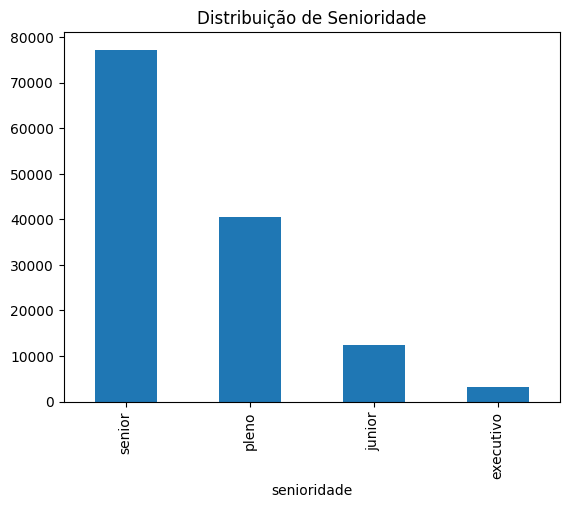

In [32]:
df_limpo['senioridade'].value_counts().plot(kind='bar', title='Distribuição de Senioridade')

<Axes: xlabel='senioridade', ylabel='usd'>

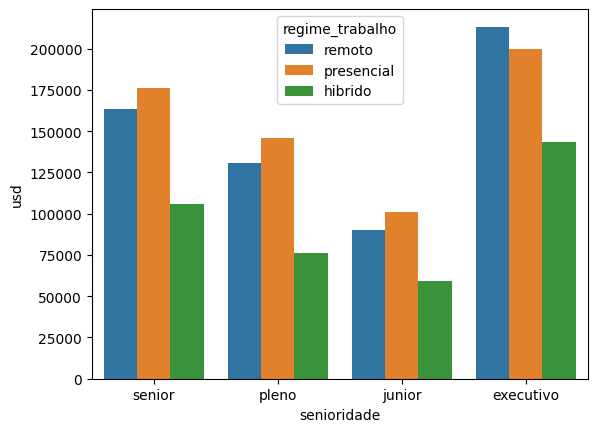

In [33]:
sns.barplot(data=df_limpo, x='senioridade', y='usd', hue='regime_trabalho', errorbar=None)

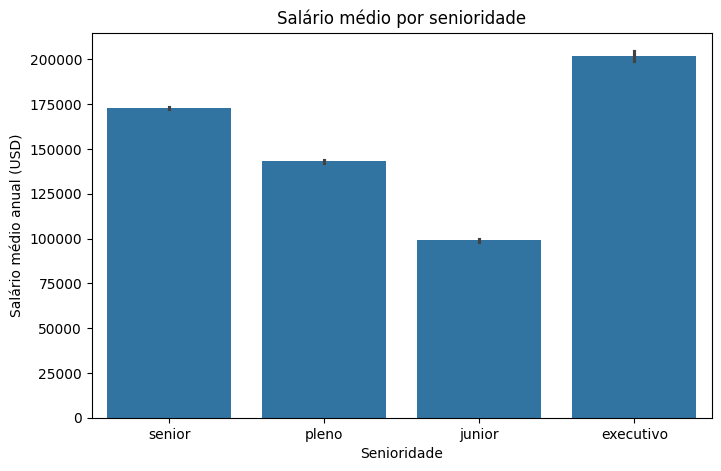

In [34]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_limpo, x='senioridade', y='usd')
plt.title("Salário médio por senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário médio anual (USD)")
plt.show()


In [35]:
df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False)

senioridade
executivo    202027.667813
senior       172850.838301
pleno        143044.845979
junior        99034.963267
Name: usd, dtype: float64

In [36]:
ordem = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=True).index
ordem

Index(['junior', 'pleno', 'senior', 'executivo'], dtype='object', name='senioridade')

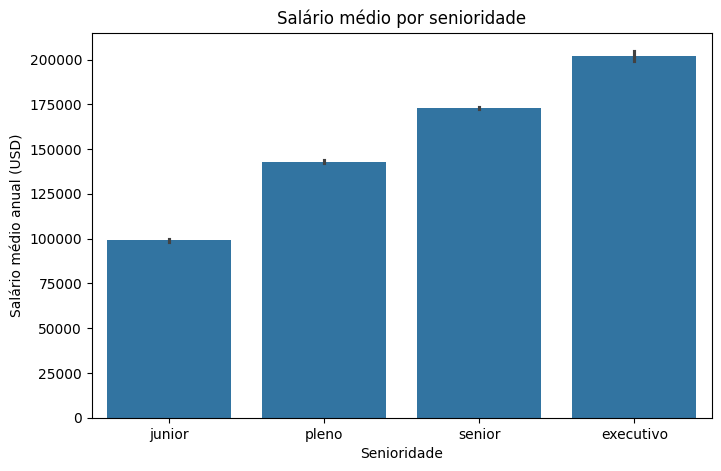

In [37]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_limpo, x='senioridade', y='usd', order=ordem)
plt.title("Salário médio por senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário médio anual (USD)")
plt.show()

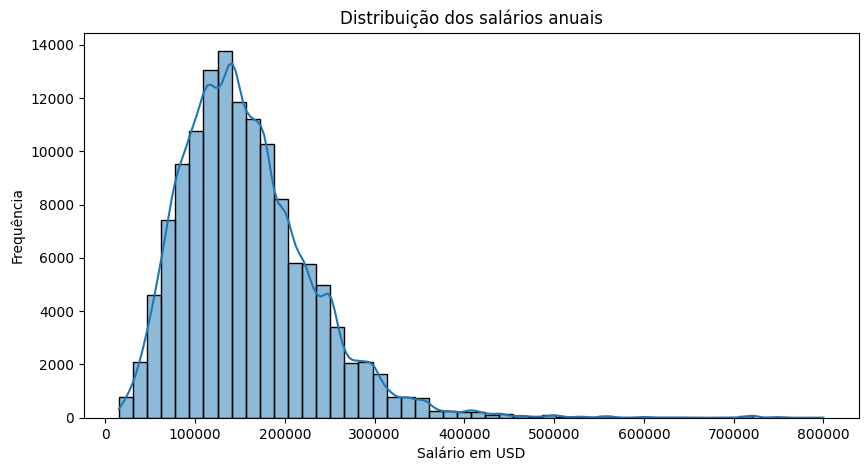

In [38]:

plt.figure(figsize=(10,5))
sns.histplot(df_limpo['usd'], bins = 50, kde=True)
plt.title("Distribuição dos salários anuais")
plt.xlabel("Salário em USD")
plt.ylabel("Frequência")
plt.show()

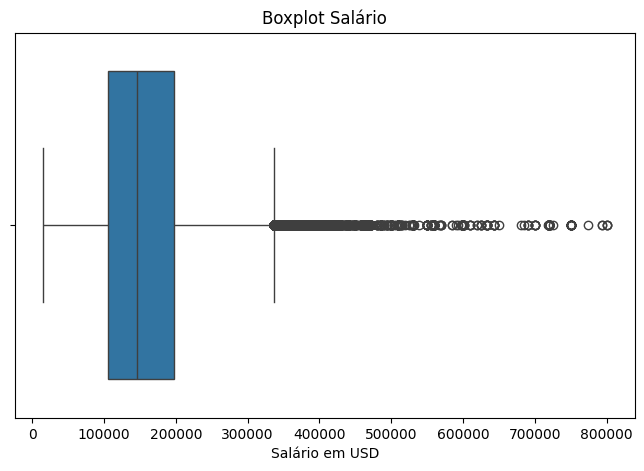

In [39]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_limpo['usd'])
plt.title("Boxplot Salário")
plt.xlabel("Salário em USD")
plt.show()


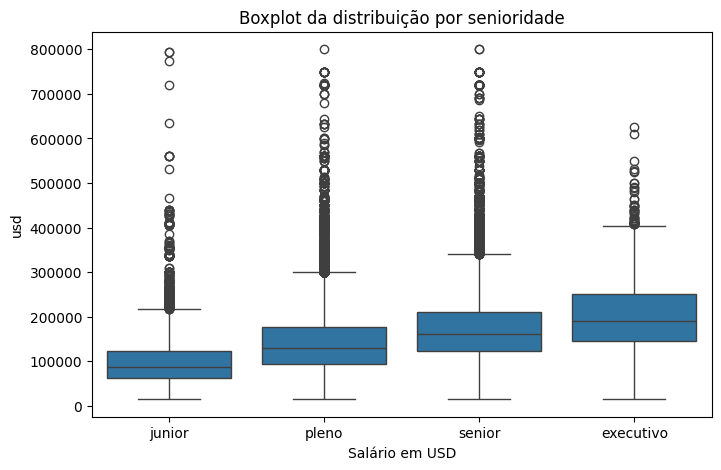

In [40]:
ordem_senioridade = ['junior', 'pleno', 'senior', 'executivo']

plt.figure(figsize=(8,5))
sns.boxplot(x='senioridade', y='usd', data=df_limpo, order=ordem_senioridade)
plt.title("Boxplot da distribuição por senioridade")
plt.xlabel("Salário em USD")
plt.show()

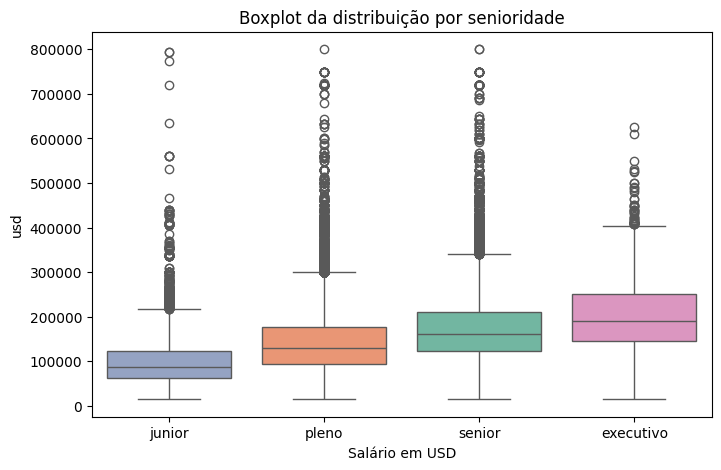

In [41]:
ordem_senioridade = ['junior', 'pleno', 'senior', 'executivo']

plt.figure(figsize=(8,5))
sns.boxplot(x='senioridade', y='usd', data=df_limpo, order=ordem_senioridade, palette='Set2', hue='senioridade')
plt.title("Boxplot da distribuição por senioridade")
plt.xlabel("Salário em USD")
plt.show()

In [44]:
# prompt: Crie um gráfico de média salarial por senioridade em barras usando o plotly

senioridade_media_salario = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(senioridade_media_salario,
             x='senioridade',
             y='usd',
             title='Média Salarial por Senioridade',
             labels={'senioridade': 'Nível de Senioridade', 'usd': 'Média Salarial Anual (USD)'})

fig.show()

In [46]:
remoto_contagem = df_limpo['regime_trabalho'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho'

          )

fig.show()
     

In [47]:
remoto_contagem = df_limpo['regime_trabalho'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho',
             hole=0.5
          )

fig.show()

In [48]:

remoto_contagem = df_limpo['regime_trabalho'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho',
             hole=0.5
          )
fig.update_traces(textinfo='percent+label')
fig.show()

In [53]:
# Função para converter ISO-2 para ISO-3
def iso2_to_iso3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

# Criar nova coluna com código ISO-3
df_limpo['residencia_iso3'] = df_limpo['residencia'].apply(iso2_to_iso3)

# Calcular média salarial por país (ISO-3)
df_ds = df_limpo[df_limpo['cargo'] == 'Data Scientist']
media_ds_pais = df_ds.groupby('residencia_iso3')['usd'].mean().reset_index()

# Gerar o mapa
fig = px.choropleth(media_ds_pais,
                    locations='residencia_iso3',
                    color='usd',
                    color_continuous_scale='rdylgn',
                    title='Salário médio de Cientista de Dados por país',
                    labels={'usd': 'Salário médio (USD)', 'residencia_iso3': 'País'})

fig.show()

In [52]:

df_limpo.to_csv('dados-imersao-final.csv', index=False)